In [1]:
in_image_path = 'ILSVRC2012_val_00005177.JPEG' # 
output_path = 'ILSVRC2012_val_00005177_processed.jpg'

In [2]:
%matplotlib inline
from IPython.display import Image
from IPython.display import display
from PIL import Image
from random import randint
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## 1. Read image and show

In [3]:
img_path = in_image_path
img = mpimg.imread(img_path)

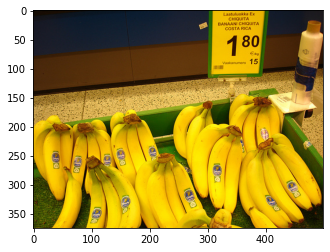

In [4]:
imgplot = plt.imshow(img)
plt.show()

## 2. Generate the Worley noise

In [5]:
HEIGHT, WIDTH = img.shape[0], img.shape[1]
n = 0
points = []
nPoints = 100
points = [np.array([randint(0,WIDTH),randint(0,HEIGHT)]) for i in range(nPoints)]

worley_noise = Image.new('RGB',(WIDTH,HEIGHT))

pixels = worley_noise.load()

for x in tqdm(range(WIDTH)):
    for y in range(HEIGHT):
        d = np.zeros(len(points))
        for i,point in enumerate(points):
            d[i] = ((point[0]-x)**2+(point[1]-y)**2)**0.5
        d.sort()
        c = int(d[n])
        pixels[x,y] = (c,c,c)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:14<00:00,  6.67it/s]


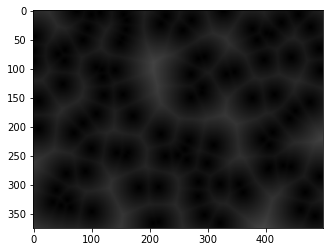

In [6]:
imgplot = plt.imshow(worley_noise)
plt.show()
worley_noise.save('worley_noise.jpg','JPEG')

## 3. Add Worley noise to the image

In [7]:
processed_img = np.add(img, 0.3*np.array(worley_noise))
processed_img = np.interp(processed_img, (0, 255), (0, 1))

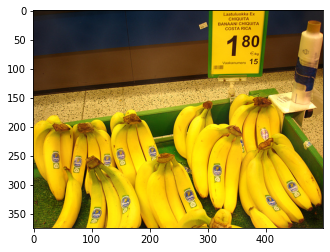

In [8]:
imgplot = plt.imshow(processed_img)

In [9]:
plt.imsave(output_path, processed_img)

## 4. Test on ResNet50 pretrained on ImageNet

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet import decode_predictions

In [11]:
model = ResNet50(weights='imagenet')

### i. Original image

In [12]:
img2 = image.load_img(in_image_path, target_size = (224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis = 0)

In [13]:
decode_predictions(model.predict(img2), top=5)

[[('n07753592', 'banana', 0.6733425),
  ('n04200800', 'shoe_shop', 0.060233913),
  ('n03461385', 'grocery_store', 0.05943153),
  ('n02927161', 'butcher_shop', 0.033280063),
  ('n04371430', 'swimming_trunks', 0.017362684)]]

### ii. Processed image

In [14]:
processed_img2 = image.load_img(output_path, target_size = (224, 224))
processed_img2 = image.img_to_array(processed_img2)
processed_img2 = np.expand_dims(processed_img2, axis = 0)

In [15]:
decode_predictions(model.predict(processed_img2), top=5)

[[('n07753592', 'banana', 0.55201805),
  ('n03461385', 'grocery_store', 0.10428718),
  ('n04200800', 'shoe_shop', 0.08283363),
  ('n02927161', 'butcher_shop', 0.02761411),
  ('n07716358', 'zucchini', 0.01464285)]]